In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## VAFQMC proposal (10.1103/PhysRevB.107.115133)



$\hat{H} = \hat{H}^t + H^{U}=  -t \sum_{\langle {\boldsymbol i}, {\boldsymbol j} \rangle, \sigma} \big( \hat{c}^\dagger_{\boldsymbol i} \hat{c}_{\boldsymbol j} +\text{H.c.} \big) -\mu \sum_{{\boldsymbol i},\sigma} n_{{\boldsymbol i},\sigma}+ U \sum_{\boldsymbol i} n_{{\boldsymbol i}, \uparrow} n_{{\boldsymbol i}, \downarrow}\quad \text {with}  \quad n_{\boldsymbol i \sigma}= c^\dagger_{\boldsymbol i \sigma} c_{\boldsymbol i \sigma}
$

$
\boxed{\text{Variational Anstaz:} \quad \big| \psi_\tau\big\rangle = \exp \big[- \tau \big(H_\text{MF}(\alpha) +{\hat H}^U\big) \big]\big | \psi_\text{MF}\big\rangle,\quad \text {Here}  \quad {\hat H}^t \Rightarrow H_\text{MF}(\alpha)}
$


$
\boxed{\exp\big[ -\tau \big(H_\text{MF}(\alpha) +H^U\big)\big] = \Big\{ \prod^n_{i=1} \exp\big[-t_i H_\text{MF} (\alpha) \big] \big[-h_i U\big] \Big\} \times \exp\Big[ -t_{n+1} H_\text{MF}(\alpha)\Big]}
$


$
\boxed{e^{-h_i U} = 2^{-L} \exp\big[ -U h_i{ \hat N}/2 \big]\sum_{\sigma_{ j, i}=\pm1} \exp[\lambda_i \sum_j \sigma_{j,i} m_j]} \quad \text{with}\quad  m_j = n_{j, \uparrow}-n_{j, \downarrow},  \quad\cosh(\lambda_i) = \exp\big[ Uh_i\big], \quad \sigma_{j i} =\pm1
$

Here, $i$ and $j$  denotes the site and time slice index, respectively.  

- In the $\tau$ is  fixed with imposing the constraint:
$
 \sum^n_{i=1} h_i =\frac{\tau}{2}
  $

-  To minimise the number of variational parameters and the number $n$, the following is used,
$
   h_i =\Delta \tau \gamma^{i-1}. \\
   t_i = \frac{h_i+h_{i-1}}{2} \quad \text{for} \quad i =1,2, \cdots n
$


-  The choice,  $h_0=0$ and $\gamma>1$,  satisfy the constraint.  

hi(i), gamma, 1/gamma, dtau= 0.1734144044814131 0.5766533656707751 1.734144044814131 0.1
hi(i), gamma, 1/gamma, dtau= 0.3007255568164315 0.5766533656707751 1.734144044814131 0.1
hi(i), gamma, 1/gamma, dtau= 0.5215014334766283 0.5766533656707751 1.734144044814131 0.1
hi(i), gamma, 1/gamma, dtau= 0.9043586052255276 0.5766533656707751 1.734144044814131 0.1
Optimized hi:
0 0.9043586052255276 0.9043586052255276 0.05
1 0.5215014334766283 0.5215014334766283 0.05
2 0.3007255568164315 0.3007255568164315 0.05
3 0.1734144044814131 0.1734144044814131 0.05
4 0.1 0.1 0.05
i, ti[i], hi[i], lambdai[i], dtau= 0 0.4521793026127638 0.9043586052255276 1.344885575226032 0.1
i, ti[i], hi[i], lambdai[i], dtau= 1 0.7129300193510779 0.5215014334766283 1.02127511815047 0.1
i, ti[i], hi[i], lambdai[i], dtau= 2 0.41111349514652984 0.3007255568164315 0.7755327933961678 0.1
i, ti[i], hi[i], lambdai[i], dtau= 3 0.2370699806489223 0.1734144044814131 0.588921734157287 0.1
i, ti[i], hi[i], lambdai[i], dtau= 4 0.1367072

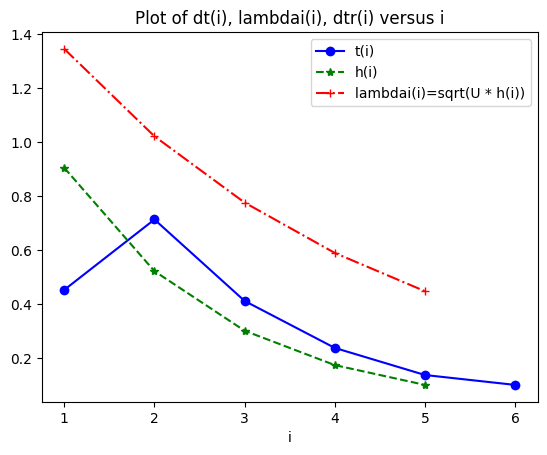

In [2]:
# beta is inverse temperature
# dtau is imaginary time
# U is hubbard U
# n is the number of time slices
# t_i i time dependent hopping
# h_i is time dpendent interactions
# time lambadi is time dependent interactions

def fun(p, n):
    cost = p ** (n - 1)
    return (1.0 - p * cost) / (1.0 - p) / cost

def time_dependent_int(beta, U, dtau, n):
    cost = beta / dtau / 2.0
    eps = 1e-14
    maxitr = 100

    if cost > n:
        gmin = 0.0
        gmax = 1.0
        iter = 0
        error = 1.0
        while error > eps and iter < maxitr:
            gamma = (gmin + gmax) / 2.0
            fun_val = fun(gamma, n)
            if fun_val > cost:
                gmin = gamma
            else:
                gmax = gamma
            error = abs(fun_val - cost)
            iter += 1

        hi = np.empty(n)
        hi[-1] = dtau
        for i in range(n - 2, -1, -1):
            hi[i] = hi[i + 1] / gamma
            print('hi(i), gamma, 1/gamma, dtau=',hi[i], gamma, 1/gamma, dtau)


    else:
        gamma = 1.0
        hi = np.full(n, beta / n / 2.0)

    lambdai = np.sqrt(U * hi)
    ti = np.empty(n + 1)
    ti[0] = hi[0] / 2.0
    for i in range(1, n):
        ti[i] = (hi[i] + hi[i - 1]) / 2.0
    ti[-1] = hi[-1]

    return hi, ti, lambdai

if __name__ == "__main__":
    # Parameters
    beta = 4
    U = 2.0
    dtau = 0.1
    n = 5

    # Call the function to get hi, ti, and lambdat
    hi, ti, lambdai = time_dependent_int(beta, U, dtau, n)

    # Print the optimized values
    print('Optimized hi:')
    for i in range(n):
        print(i, hi[i], np.sum(hi[i]), dtau/2.)


    
    for i in range(1*n+0):
        print('i, ti[i], hi[i], lambdai[i], dtau=',i, ti[i], hi[i], lambdai[i], dtau)
    # Plot the results
    plt.plot(range(1, n + 2), ti, 'bo-', label='t(i)')
    plt.plot(range(1, n + 1), hi, 'g*--', label='h(i)')
    plt.plot(range(1, n + 1), lambdai, 'r+-.', label='lambdai(i)=sqrt(U * h(i))')
    plt.xlabel('i')
    plt.ylabel('')
    plt.title('Plot of dt(i), lambdai(i), dtr(i) versus i')
    plt.legend()
    plt.show()


#### Function `fun(gamma, n)`

This function calculates the value of `fun`, which is used to determine the optimal value of `gamma`.

Where:
- `gamma` is the parameter being optimized.
- `n` is a given parameter.
- `cost = gamma * (n - 1)`.

#### Function `prepbeta(beta, U, dtmin, n)`

This function calculates the optimal values of `hi` based on the given parameters `beta`, `U`, `dtmin`, and `n`.

It iteratively finds the value of `gamma` that satisfies a certain condition (`fun_value > cost`) using the bisection method.

After finding the optimal `gamma`, it calculates the values of `dt`, `lambda`, and `ti` based on the following formulas:

- `hi(i) = dtmin * gamma^(i - 1)`
- `lambda(i) = sqrt(U * hi(i))`
- `ti(i) = (hi(i) + hi(i - 1)) / 2`

## ALF time dpendent

beta, theta, Ltrot, dtau = 4 5 150 0.1
1 150 (0.044721359549995794+0j) (0.31622776601683794+0j)
2 149 (0.06324555320336758+0j) (0.31622776601683794+0j)
3 148 (0.07745966692414834+0j) (0.31622776601683794+0j)
4 147 (0.08944271909999159+0j) (0.31622776601683794+0j)
5 146 (0.1+0j) (0.31622776601683794+0j)
6 145 (0.10954451150103323+0j) (0.31622776601683794+0j)
7 144 (0.11832159566199232+0j) (0.31622776601683794+0j)
8 143 (0.12649110640673517+0j) (0.31622776601683794+0j)
9 142 (0.1341640786499874+0j) (0.31622776601683794+0j)
10 141 (0.1414213562373095+0j) (0.31622776601683794+0j)
11 140 (0.14832396974191325+0j) (0.31622776601683794+0j)
12 139 (0.15491933384829668+0j) (0.31622776601683794+0j)
13 138 (0.161245154965971+0j) (0.31622776601683794+0j)
14 137 (0.16733200530681513+0j) (0.31622776601683794+0j)
15 136 (0.17320508075688773+0j) (0.31622776601683794+0j)
16 135 (0.17888543819998318+0j) (0.31622776601683794+0j)
17 134 (0.18439088914585774+0j) (0.31622776601683794+0j)
18 133 (0.1897366596

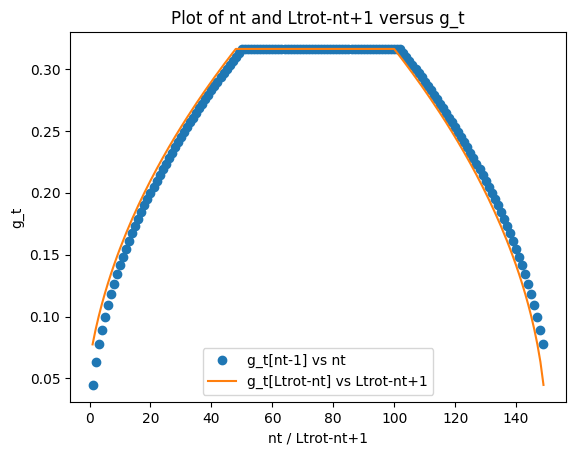

In [12]:
beta = 4
dtau = 0.1
theta = 5
ham_U = 2.0
Ltrot = int(theta / dtau)
Thtrot = int(theta/dtau)
Ltrot = Ltrot+2*Thtrot

print('beta, theta, Ltrot, dtau =', beta, theta, Ltrot, dtau)
# 
g_t = np.zeros(Ltrot+1, dtype=np.complex128)
# Assign the initial value to g_t
g_t[:] = np.sqrt(dtau * ham_U / 2.0)
# Loop to update g_t
for nt in range(1, Thtrot+1):
    g_t[nt-1] = np.sqrt(dtau * float(nt) / float(Thtrot) * ham_U / 2.0)
    g_t[Ltrot-(nt-1)] = np.sqrt(dtau * float(nt) / float(Thtrot) * ham_U / 2.0)
    print(nt, Ltrot-nt+1, g_t[nt-1], g_t[Ltrot-nt])
plt.plot(range(1, Ltrot), g_t[:Ltrot-1].real, 'o', label='g_t[nt-1] vs nt')
plt.plot(range(1, Ltrot), g_t[Ltrot-2::-1].real, '-', label='g_t[Ltrot-nt] vs Ltrot-nt+1')
plt.xlabel('nt / Ltrot-nt+1')
plt.ylabel('g_t')
plt.title('Plot of nt and Ltrot-nt+1 versus g_t')
plt.legend()
plt.show()


   $
   \mathcal{T} e^{-\int^\beta_0} d \tau \hat{H} (\tau) \ne \Big({\mathcal T} e^{-\int^\beta_0 d\tau \hat{H} (\tau)} \Big)^\dagger
 $

 
    Asymmetric Trotter:
    
  $
    \hat{U}_\text{Approx} =\prod^{L_\text{Trotter}}_{\tau=1} \Big(\prod^{N_O}_{i=1} e^{-\Delta \tau O_{i,\tau}} \prod^{N_T}_{j=1}e^{-\Delta\tau\hat{T}
    _{j,\tau}} \Big)
$

   Symmetric Trotter For the symmetric Trotter, we use
   $
               \hat{U}_\text{Approx} =\prod^{L_\text{Trotter}}_{\tau=1} \Big[ \Big(\prod^{N_T-1}_{j=1} e^{-\frac{\Delta\tau }{4} \hat{T}_{j,\tau}} \Big)e^{-\frac{\Delta\tau}{2} \hat{T}_{N_T,\tau}}    \Big(\prod^1_{j=N_T-1} e^{-\frac{\Delta \tau}{4} \hat{T}_{j,\tau}}\Big)  \\
               \times  \Big(\prod^{N_O-1}_{i=1} e^{-\frac{\Delta\tau }{2} \hat{O}_{i,\tau}} \Big)e^{-\Delta\tau \hat{O}_{N_O,\tau}}    \Big(\prod^1_{N_O-1} e^{-\frac{\Delta \tau}{2} \hat{O}_{i,\tau}}\Big)\times \Big(\prod^{N_T-1}_{j=1} e^{-\frac{\Delta\tau }{4} \hat{T}_{j,\tau}} \Big)e^{-\frac{\Delta\tau}{2} \hat{T}_{N_T,\tau}}    \Big(\prod^1_{j=N_T-1} e^{-\frac{\Delta \tau}{4} \hat{T}_{j,\tau}}\Big)\Big] 
               $
               
  ALF Trotter decomposition:
$
 \Big(\prod^{N_T-1}_{j=1} e^{-\frac{\Delta\tau}{4} \hat{T}_{j,\tau+1} }\Big)e^{-\frac{\Delta\tau}{2}\hat{T}_{N_T,\tau+1} }  \Big(\prod^1_{j=N_T-1}e^{-\frac{\Delta \tau}{4}} \hat{T}_{j,\tau+1} \Big) \Big(\prod^{N_T-1}_{j=1} e^{-\frac{\Delta\tau}{4}} \hat{T}_{j,\tau}\Big)    e^{-\frac{\Delta \tau}{2} \hat{T}_{N_T,\tau}}\Big(\prod^1_{j=N_T-1} e^{-\frac{\Delta\tau}{4} \hat{T}_{j,\tau}} \Big) 
 \\\approx 
 \Big(\prod^{N_T-1}_{j=1}e^{-\frac{\Delta\tau}{4}  (\hat{T}_{j,\tau+1}+\hat{T}_{j,\tau})} \Big) e^{-\frac{\Delta\tau}{2} (\hat{T}_{N_T,\tau+1}+ \hat{T}_{N_T,\tau})} \Big(\prod^1_{N_T-1} e^{-\frac{\Delta\tau}{4} (\hat{T}_{j,\tau+1}+\hat{T}_{j,\tau})}\Big)
 $
 
 

```fortran
    Ltrot  = nint(beta/dtau)
          Thtrot = 0
          if (Projector) Thtrot = nint(theta/dtau)
          Ltrot = Ltrot+2*Thtrot
```

```fortran

Allocate(Op_V(Ndim,N_FL))
do nf = 1,N_FL
doi =1,Ndim
Call Op_make(Op_V(i,nf), 1)
enddo enddo
Do nf = 1,N_FL
   X = 1.d0
if(nf==2) X=-1.d0 Do i = 1,Ndim
      Op_V(i,nf)%P(1)   = I
      Op_V(i,nf)%O(1,1) = cmplx(1.d0, 0.d0, kind(0.D0))
      If (Adiabatic)   then
         Allocate(OP_V(i,nf)%g_t(Ltrot))
         Op_V(i,nf)%g_t  = X*SQRT(CMPLX(DTAU*ham_U/2.d0, 0.D0, kind(0.D0)))
         do  nt = 1, Thtrot
            Op_V(i,nf)%g_t(nt)            = X*SQRT(CMPLX(DTAU*dble(nt)/dble(thtrot)* &
                                            & ham_U/2.d0, 0.D0, kind(0.D0)))
            Op_V(i,nf)%g_t(Ltrot-(nt-1))  = X*SQRT(CMPLX(DTAU*dble(nt)/dble(thtrot)* &
                                            & ham_U/2.d0, 0.D0, kind(0.D0)))
enddo else
         Op_V(i,nf)%g      = X*SQRT(CMPLX(DTAU*ham_U/2.d0, 0.D0, kind(0.D0)))
      endif
      Op_V(i,nf)%alpha  = cmplx(-0.5d0, 0.d0, kind(0.D0))
      Op_V(i,nf)%type   = 2
      Call Op_set( Op_V(i,nf) )
Enddo Enddo
```

```fortran
         Subroutine Ham_Hop

         Implicit none

         Integer :: nf , I, Ix, Iy, nt
         allocate(Op_T(1,N_FL))
         do nf = 1,N_FL
            Call Op_make(Op_T(1,nf),Ndim)
            Do I = 1,Latt%N
               Ix = Latt%nnlist(I,1,0)
               Op_T(1,nf)%O(I,  Ix) = cmplx(-Ham_T,    0.d0, kind(0.D0))
               Op_T(1,nf)%O(Ix, I ) = cmplx(-Ham_T,    0.d0, kind(0.D0))
               If ( L2 > 1 ) then
                  Iy = Latt%nnlist(I,0,1)
                  Op_T(1,nf)%O(I,  Iy) = cmplx(-Ham_T,    0.d0, kind(0.D0))
                  Op_T(1,nf)%O(Iy, I ) = cmplx(-Ham_T,    0.d0, kind(0.D0))
               endif

               Op_T(1,nf)%O(I,  I ) = cmplx(-Ham_chem, 0.d0, kind(0.D0))
               Op_T(1,nf)%P(I) = I
            Enddo
            If  (Adiabatic)   then
               Allocate(OP_T(1,nf)%g_t(Ltrot))
               Op_T(1,nf)%g_t  = -Dtau
               do  nt = 1, Thtrot
                  Op_T(1,nf)%g_t(nt) = -Dtau*dble(nt)/dble(thtrot)
                  Op_T(1,nf)%g_t(Ltrot-(nt-1))  = -Dtau*dble(nt)/dble(thtrot)
               enddo
            else
            Op_T(1,nf)%g      = -Dtau
            endif
            Op_T(1,nf)%alpha  =  cmplx(0.d0,0.d0, kind(0.D0))
            Call Op_set(Op_T(1,nf))
         enddo
       end Subroutine Ham_Hop
!--------------------------------------------------------------------
```